In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 2.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.3.1
    Uninstalling pip-20.3.1:
      Successfully uninstalled pip-20.3.1


In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [4]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Dataset%20Brazilian%20Senators/Senadores.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Senadores.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 130 rows and 8 columns


In [5]:
df1.head()

,SENADOR,UF,PARTIDO,NATURALIDADE,CURSO,GRAU,FACULDADE,Exerc�cio
0,DAVI ALCOLUMBRE,AP,DEM,AP,Ci�ncias Econ�micas,Superior Incompleto,Centro de Ensino Superior do Amapa (CEAP),Em Exerc�cio
1,JOS� AGRIPINO,RN,DEM,RN,Especializa��o de Tabules,P�sgradua��o,Universidade do Estado da Guanabara,Em Exerc�cio
2,MARIA DO CARMO ALVES,SE,DEM,SE,Direito,Superior,Universidade Federal de Sergipe,Em Exerc�cio
3,RONALDO CAIADO,GO,DEM,GO,Cirugi�o Ortopedista,P�sgradua��o,Servi�o de Cirurgia Ortop�dica e Traumatol�gic...,Em Exerc�cio
4,WILDER MORAIS,GO,DEM,GO,Engenharia Civil,Superior,Pontif�cia Universidade Cat�lica de Goi�s,Em Exerc�cio


/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


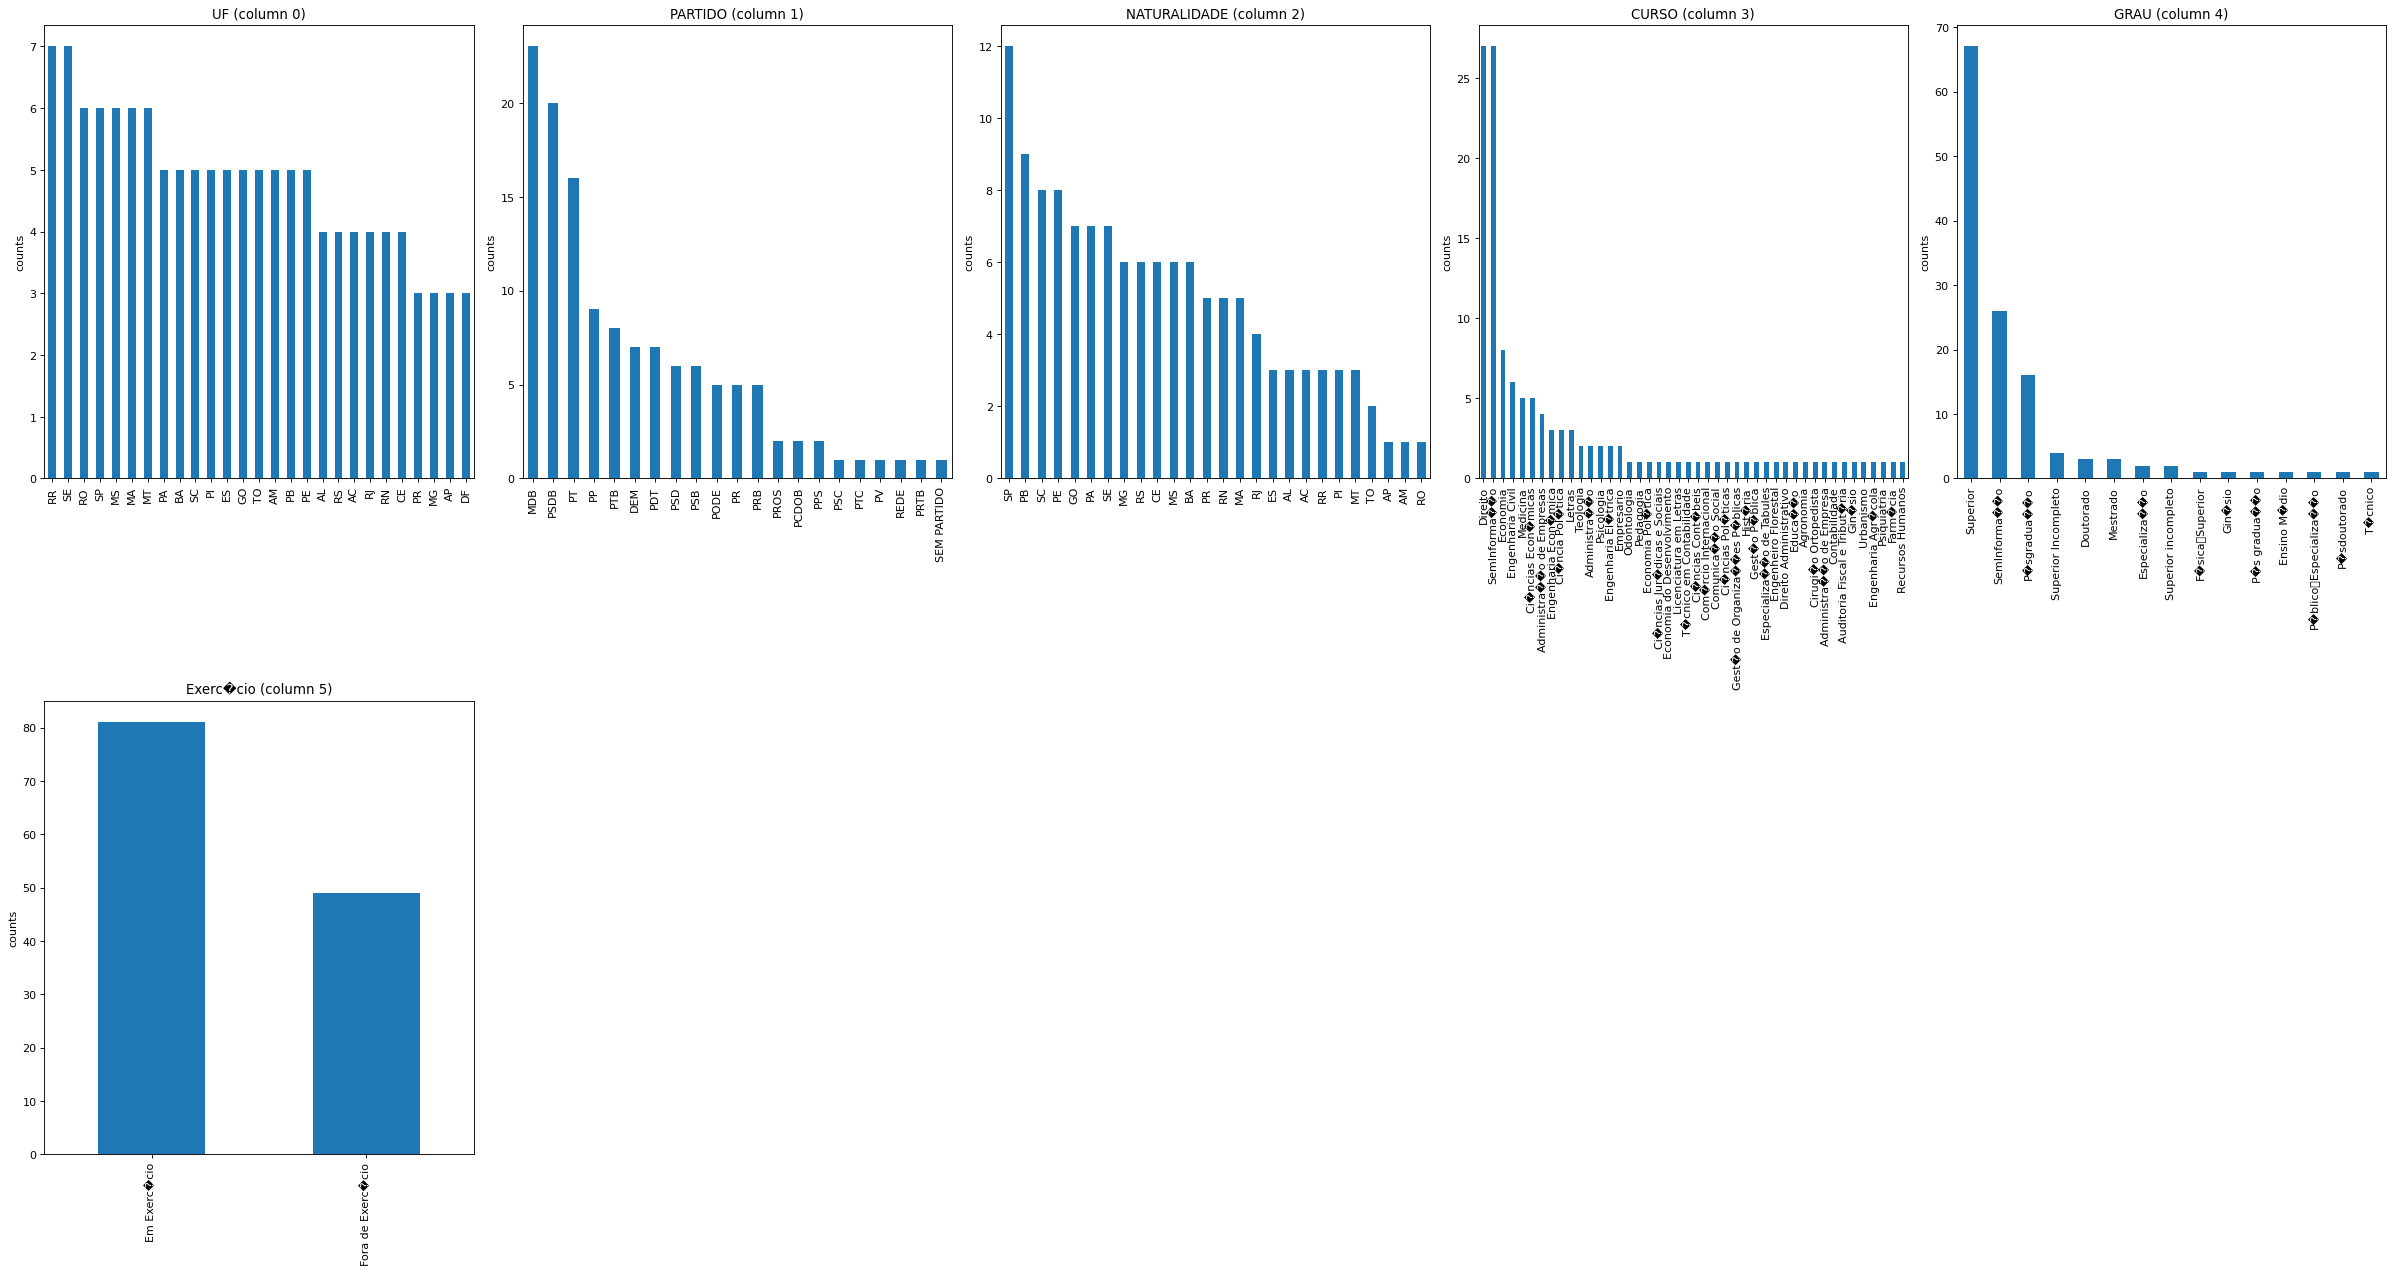

In [6]:
plotPerColumnDistribution(df1,10, 5)

In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Dataset%20Brazilian%20Senators/distancia.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'senadores.csv'
nRow, nCol = df2.shape

In [8]:
df2.head(5)

,UF,Dist�ncia
0,SE,1292
1,PA,1593
2,MG,624
3,RR,2497
4,DF,0


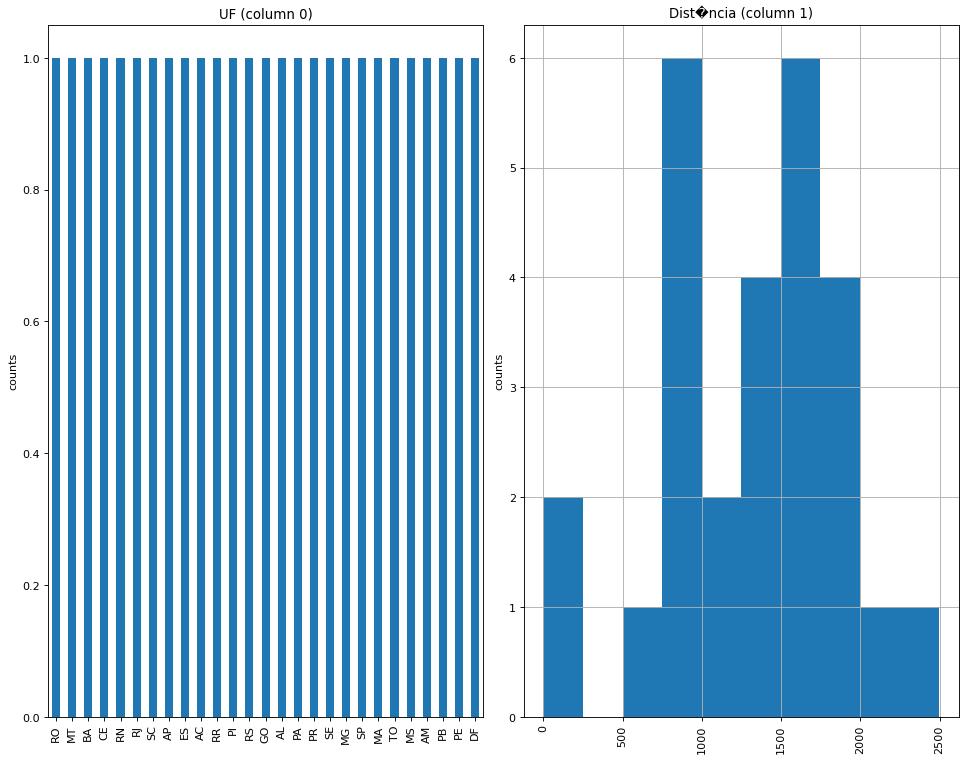

In [9]:
plotPerColumnDistribution(df2, 10, 5)

In [10]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df3 = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Dataset%20Brazilian%20Senators/mandato%20senadores.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'mandato senadores.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 131 rows and 4 columns


In [11]:
df3.head(5)

,SENADOR MIN,ELEI��ES 2018,STATUS DE MANDATO,SENADOR
0,Airton Sandoval,nenhum,Fim de Mandato,AIRTON SANDOVAL
1,Ana Am�lia,vice presidente,Fim de Mandato,ANA AM�LIA
2,Antonio Carlos Valadares,reelei��o,Fim de Mandato,ANTONIO CARLOS VALADARES
3,Armando Monteiro,governador,Fim de Mandato,ARMANDO MONTEIRO
4,Ata�des Oliveira,reelei��o,Fim de Mandato,ATA�DES OLIVEIRA


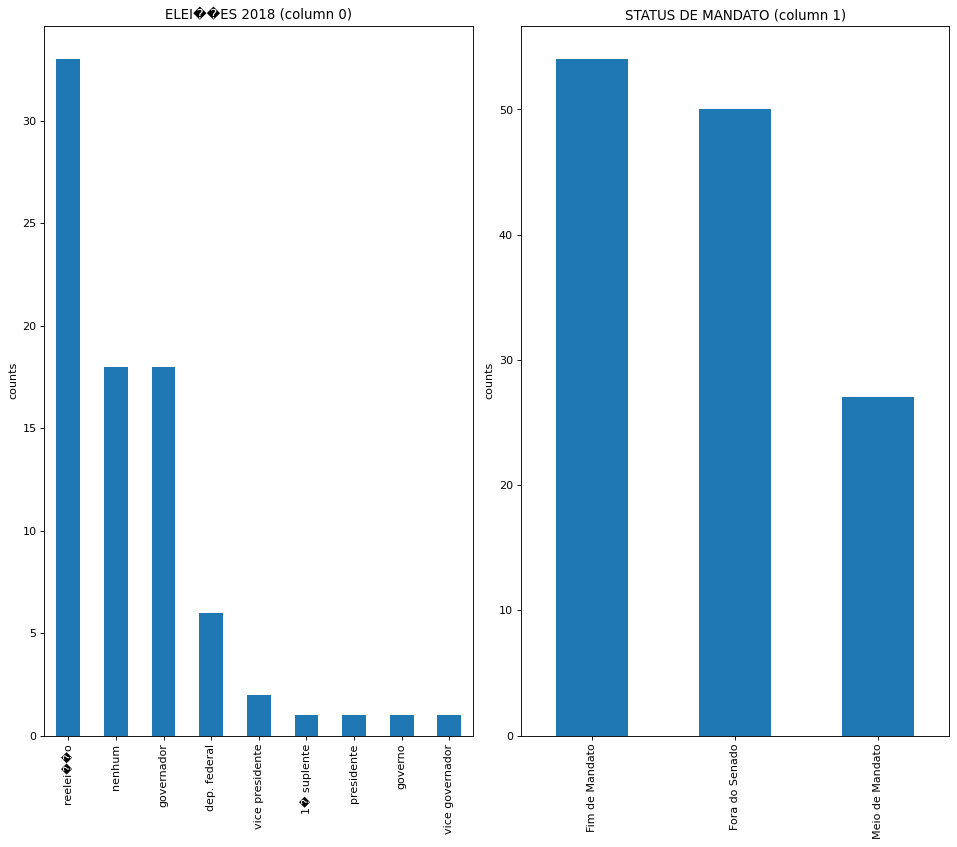

In [12]:
plotPerColumnDistribution(df3, 10 ,3)